In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Funcao que sera utilizada maisi para frente para calculo de distancia com lat,lng

In [2]:
def haversine(lat1, lon1, lat2, lon2):
    # Converte coordenadas de graus para radianos
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    r_terra_km = 6371

    # Aplica a fórmula de Haversine
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return c * r_terra_km

# Exemplo de uso
lat1, lon1 = -23.550520, -46.633308  # Coordenadas de São Paulo, Brasil
lat2, lon2 = -22.906846, -43.172896  # Coordenadas do Rio de Janeiro, Brasil

distancia = haversine(lat1, lon1, lat2, lon2)
print(f"A distância entre São Paulo e Rio de Janeiro é de aproximadamente {distancia} quilômetros.")


A distância entre São Paulo e Rio de Janeiro é de aproximadamente 360.7493675462788 quilômetros.


# Importando dados em um dataframe

In [3]:
df = pd.read_csv("./dados_inmet.csv", delimiter=";", decimal=",")
# Drop columns with all NaN values
df.dropna(axis=1, how="all", inplace=True)
# Drop lines with NaN values
df.dropna(inplace=True)

In [4]:
df.describe()

,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr) ( (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000
mean,0.148592,952.367675,952.689403,952.117660,1301.739562,24.677999,16.743202,25.407558,23.690268,17.494805,16.021459,69.388640,61.859636,65.041025,159.263091,5.118513,1.966915
std,1.387003,41.037962,41.040651,41.030751,1139.938495,5.080869,4.063358,5.268282,5.080786,3.995566,4.139829,19.682851,20.478558,20.044242,104.235515,2.692032,1.498486
min,0.000000,820.900000,821.000000,820.700000,0.000000,-1.300000,-7.500000,-0.200000,-1.400000,-6.100000,-9.400000,9.000000,7.000000,8.000000,1.000000,0.000000,0.000000
25%,0.000000,920.100000,920.400000,919.900000,200.100000,21.300000,14.100000,21.900000,20.400000,14.900000,13.400000,55.000000,46.000000,50.000000,71.000000,3.300000,0.900000
50%,0.000000,950.200000,950.500000,950.000000,1086.200000,24.700000,17.400000,25.500000,23.700000,18.100000,16.700000,71.000000,62.000000,66.000000,136.000000,4.900000,1.700000
75%,0.000000,985.700000,986.100000,985.500000,2237.400000,28.200000,19.800000,29.100000,27.200000,20.500000,19.100000,86.000000,78.000000,82.000000,245.000000,6.700000,2.700000
max,131.000000,1032.300000,1032.400000,1032.100000,6670.300000,42.600000,37.400000,43.500000,42.200000,38.000000,36.000000,100.000000,100.000000,100.000000,360.000000,34.200000,15.100000


In [5]:
df['LATITUDE'] = df['LATITUDE'].str.replace(',', '.').astype(float)
df['LONGITUDE'] = df['LONGITUDE'].str.replace(',', '.').astype(float)

In [6]:
df['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d')

In [7]:
dia = df['Data'].dt.day
mes = df['Data'].dt.month
primeiro_dia_do_mes = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
df['dia_do_ano'] = mes.apply(lambda x: primeiro_dia_do_mes[x-1]) + dia
df.drop(columns=['Data'], inplace=True)

Text(0.5, 0, 'Dia do ano')

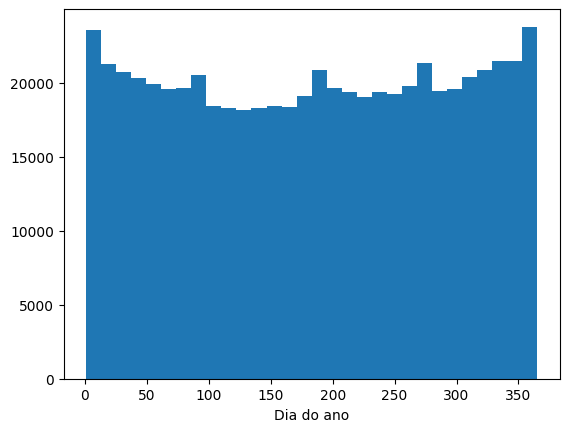

In [8]:
# histograma para coluna 'dia_do_ano'
plt.hist(df['dia_do_ano'], bins=30)
plt.xlabel('Dia do ano')

/tmp/ipykernel_136085/1687318548.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


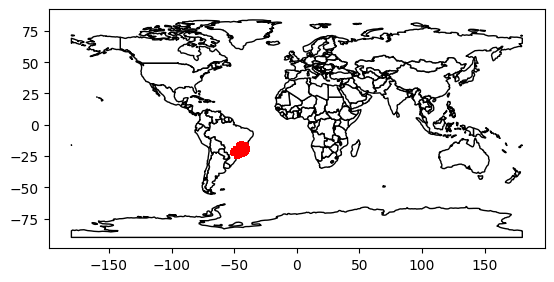

In [9]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Converter as coordenadas para geometria de pontos
gdf = GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])])

# Carregar um mapa mundi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotar o mapa mundi
base = world.plot(color='white', edgecolor='black')

# Plotar os pontos no mapa
gdf.plot(ax=base, marker='o', color='red', markersize=5)

# Mostrar o plot
plt.show()


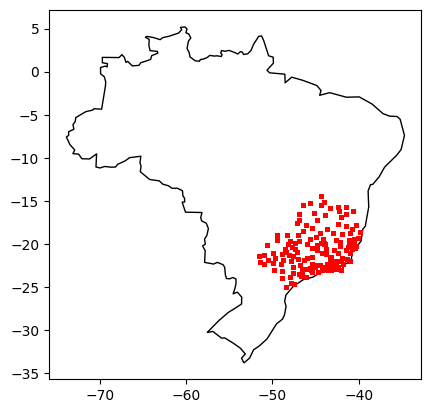

In [10]:
brasil = world[world.name == 'Brazil']
base = brasil.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)
plt.show()

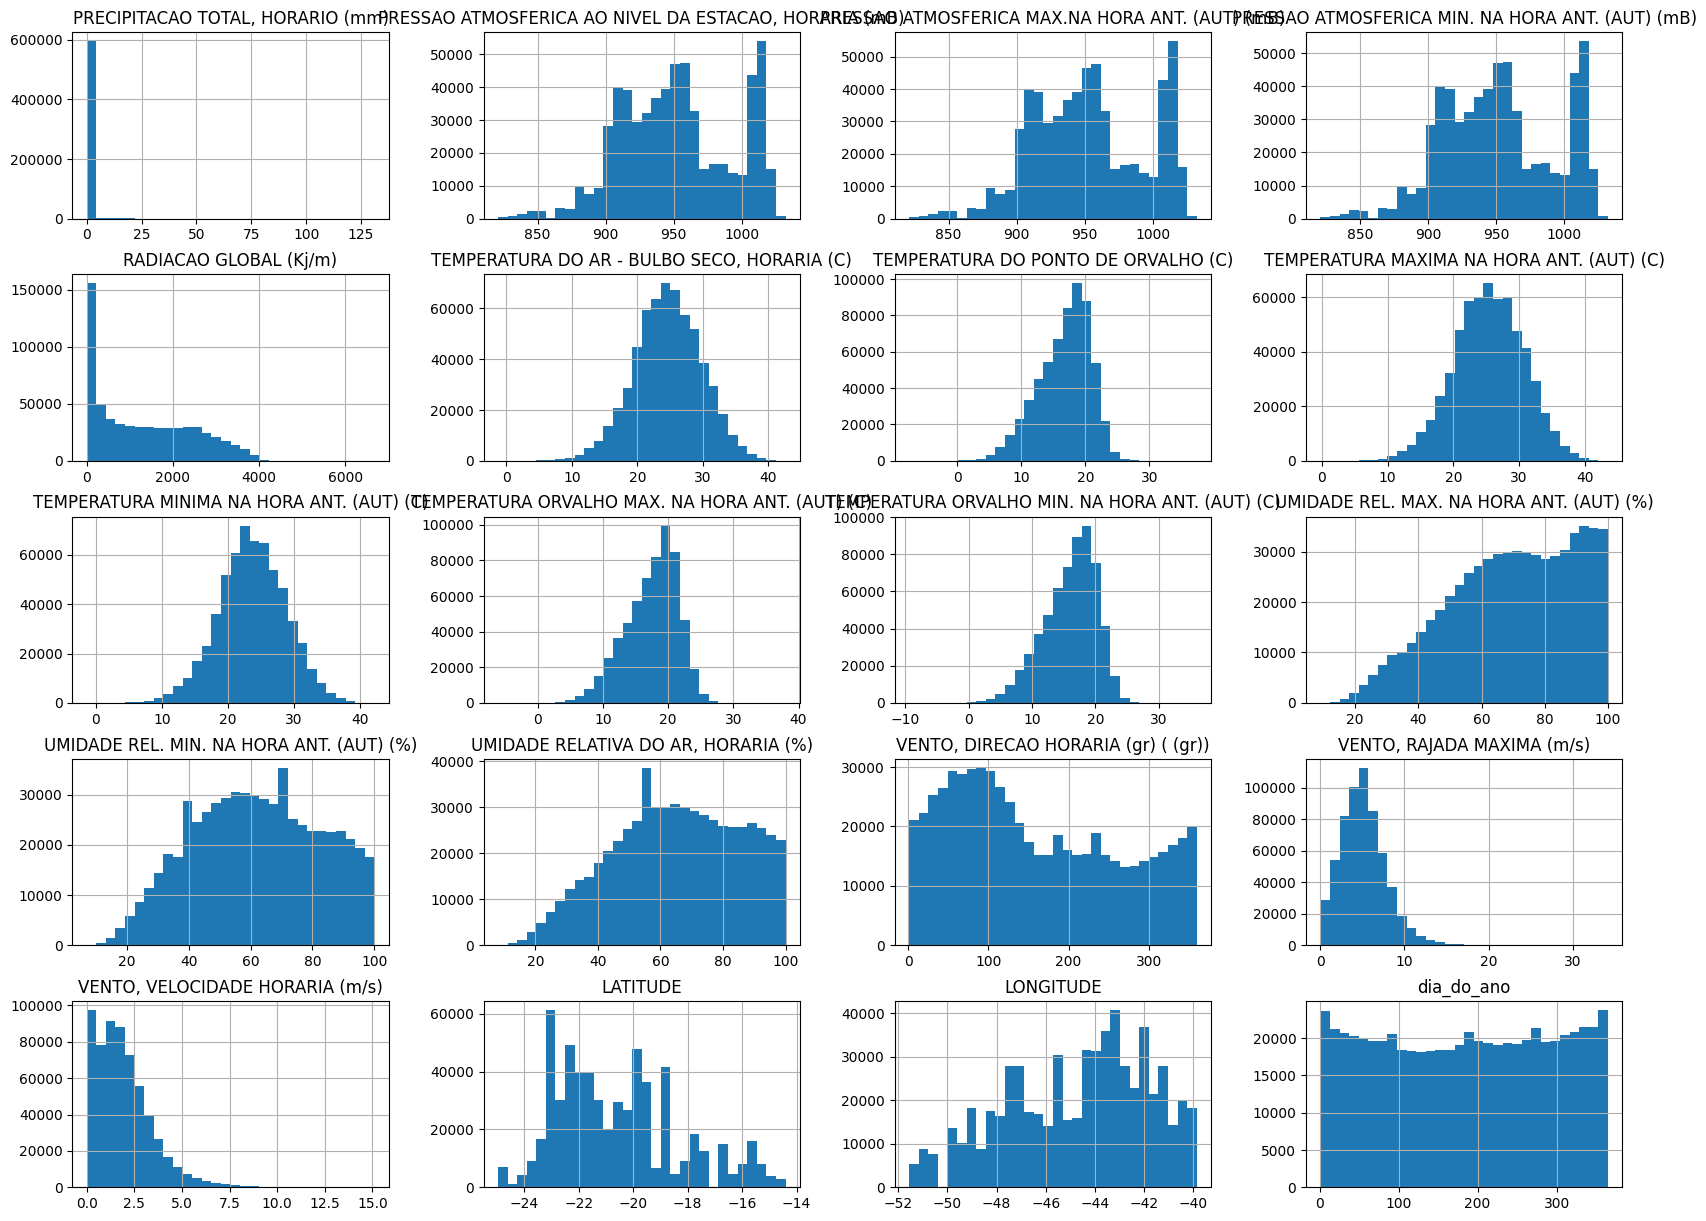

In [11]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

In [12]:
focos_df = pd.read_csv("./cleaned_full_focos_qmd_inpe_20230301_20240101.csv")
# Quantidade de linhas
print(f"Quantidade de linhas: {focos_df.shape[0]}")

Quantidade de linhas: 4677689


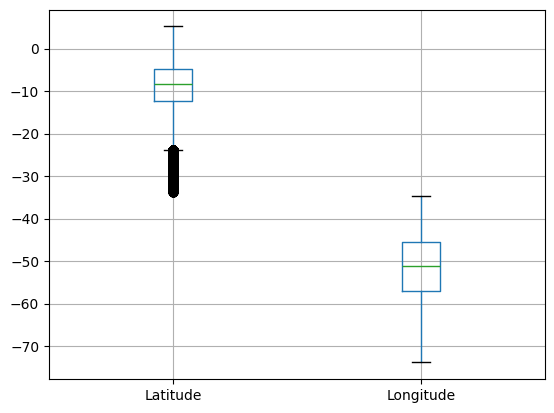

In [13]:
# boxplot para coluna 'Latitude' e a coluna 'Longitude'
focos_df.boxplot(column=['Latitude', 'Longitude'])
plt.show()

# Reposicionando os focos de incendio para coincidir com a estacao mais proxima 

Caso a distancia seja maior que 500 kms, considerar que a distancia infinita

Nota do Heitor do futuro, o Heitor do passado nao imaginava q isso iam ser 5 trilhoes de chamadas da funcao harversine

In [14]:
# import pandas as pd
# import numpy as np
# from sklearn.neighbors import NearestNeighbors

# # Supondo que 'df' seja o seu DataFrame de estações
# # e que você já tenha as colunas 'LATITUDE' e 'LONGITUDE'
# estacoes = np.radians(df[['LATITUDE', 'LONGITUDE']].values)  # Converte para radianos

# # Supondo que 'focos_df' seja o seu DataFrame de focos
# # com as colunas 'Latitude' e 'Longitude'
# focos = np.radians(focos_df[['Latitude', 'Longitude']].values)  # Converte para radianos
# # Instanciar o NearestNeighbors com a métrica haversine
# nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree', metric='haversine')

# # Ajustar o modelo com as coordenadas das estações
# nn.fit(estacoes)

# # Encontrar a estação mais próxima para cada foco
# distancias, indices = nn.kneighbors(focos)

# # Converter distâncias de radianos para quilômetros (6371 km é o raio aproximado da Terra)
# distancias_km = distancias * 6371

# # Filtrar focos com estação mais próxima a menos de 500 km e atualizar suas coordenadas
# focos_df['EstacaoMaisProximaDistancia'] = distancias_km.flatten()
# condicao = focos_df['EstacaoMaisProximaDistancia'] <= 500
# focos_df_filtrado = focos_df[condicao].reset_index(drop=True)

# # Atualizar DataFrame com as coordenadas da estação mais próxima (opcional)
# focos_df_filtrado['EstacaoLat'] = df.loc[indices[condicao].flatten(), 'LATITUDE'].values
# focos_df_filtrado['EstacaoLon'] = df.loc[indices[condicao].flatten(), 'LONGITUDE'].values

# Cortando o tamanho do dataset por questao de tempo do hackathoon

In [15]:
# Manter os fooos que estão dentro do quadrado
print(df['LATITUDE'].min(), df['LONGITUDE'].min(), df['LATITUDE'].max(), df['LONGITUDE'].max())
condicao = (focos_df['Latitude'] >= df['LATITUDE'].min()) & (focos_df['Latitude'] <= df['LATITUDE'].max()) & (focos_df['Longitude'] >= df['LONGITUDE'].min()) & (focos_df['Longitude'] <= df['LONGITUDE'].max())    
focos_df = focos_df[condicao].reset_index(drop=True)

-24.96277777 -51.55222222 -14.40833333 -39.86416666


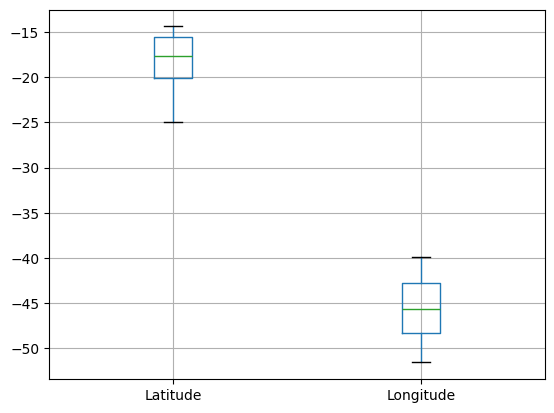

In [16]:
focos_df.boxplot(column=['Latitude', 'Longitude'])
plt.show()

/tmp/ipykernel_136085/3196176692.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


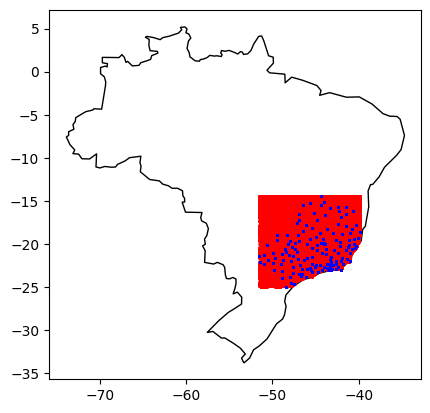

In [17]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Converter as coordenadas para geometria de pontos
gdf = GeoDataFrame(focos_df, geometry=[Point(xy) for xy in zip(focos_df['Longitude'], focos_df['Latitude'])])
gdf_2 = GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])])

# Carregar um mapa mundi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = world[world.name == 'Brazil']
# Plotar o mapa mundi
base = brasil.plot(color='white', edgecolor='black')

# Plotar os pontos no mapa
gdf.plot(ax=base, marker='o', color='red', markersize=1)
gdf_2.plot(ax=base, marker='o', color='blue', markersize=1)

# Mostrar o plot
plt.show()


Porcentagem de dados e focoo que foram removidos limitando ao quadrado que circunda o sudeste

In [18]:
(4677689 - df.shape[0])/4677689

0.8715962091537082

In [19]:
df.describe()

,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr) ( (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",LATITUDE,LONGITUDE,dia_do_ano
count,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000
mean,0.148592,952.367675,952.689403,952.117660,1301.739562,24.677999,16.743202,25.407558,23.690268,17.494805,16.021459,69.388640,61.859636,65.041025,159.263091,5.118513,1.966915,-20.552553,-44.697444,184.148984
std,1.387003,41.037962,41.040651,41.030751,1139.938495,5.080869,4.063358,5.268282,5.080786,3.995566,4.139829,19.682851,20.478558,20.044242,104.235515,2.692032,1.498486,2.251380,2.890574,107.686967
min,0.000000,820.900000,821.000000,820.700000,0.000000,-1.300000,-7.500000,-0.200000,-1.400000,-6.100000,-9.400000,9.000000,7.000000,8.000000,1.000000,0.000000,0.000000,-24.962778,-51.552222,1.000000
25%,0.000000,920.100000,920.400000,919.900000,200.100000,21.300000,14.100000,21.900000,20.400000,14.900000,13.400000,55.000000,46.000000,50.000000,71.000000,3.300000,0.900000,-22.376111,-46.949722,89.000000
50%,0.000000,950.200000,950.500000,950.000000,1086.200000,24.700000,17.400000,25.500000,23.700000,18.100000,16.700000,71.000000,62.000000,66.000000,136.000000,4.900000,1.700000,-20.762607,-44.173333,186.000000
75%,0.000000,985.700000,986.100000,985.500000,2237.400000,28.200000,19.800000,29.100000,27.200000,20.500000,19.100000,86.000000,78.000000,82.000000,245.000000,6.700000,2.700000,-19.232500,-42.389167,279.000000
max,131.000000,1032.300000,1032.400000,1032.100000,6670.300000,42.600000,37.400000,43.500000,42.200000,38.000000,36.000000,100.000000,100.000000,100.000000,360.000000,34.200000,15.100000,-14.408333,-39.864167,365.000000


In [20]:
focos_df.describe()

,DiaSemChuva,Precipitacao,Latitude,Longitude,minuto_do_dia,dia_do_ano
count,275180.000000,275180.000000,275221.000000,275221.000000,275221.000000,275221.000000
mean,-4.045134,1.012653,-18.022882,-45.542229,767.514979,243.912423
std,121.826883,4.057504,2.694521,3.251502,365.825232,75.183169
min,-999.000000,0.000000,-24.962690,-51.552090,0.000000,1.000000
25%,3.000000,0.000000,-20.081040,-48.289070,300.000000,204.000000
50%,6.000000,0.000000,-17.635100,-45.590199,960.000000,259.000000
75%,12.000000,0.000000,-15.607190,-42.722310,1020.000000,297.000000
max,120.000000,127.540000,-14.408380,-39.864170,1380.000000,365.000000


In [21]:
print(df.shape[0],focos_df.shape[0])

600633 275221


In [22]:
df.columns

Index(['Hora UTC', 'PRECIPITACAO TOTAL, HORARIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (C)',
       'TEMPERATURA DO PONTO DE ORVALHO (C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIRECAO HORARIA (gr) ( (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'LATITUDE', 'LONGITUDE',
       'dia_do_ano'],
      dtype='object')

In [23]:
df['minuto_do_dia'] = df['Hora UTC'].str.replace('UTC', '').str.strip().astype(int)/100*60


In [24]:
df.drop(columns=['Hora UTC'], inplace=True)

In [25]:
df.describe()

,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),...,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr) ( (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",LATITUDE,LONGITUDE,dia_do_ano,minuto_do_dia
count,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,...,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000,600633.000000
mean,0.148592,952.367675,952.689403,952.117660,1301.739562,24.677999,16.743202,25.407558,23.690268,17.494805,...,69.388640,61.859636,65.041025,159.263091,5.118513,1.966915,-20.552553,-44.697444,184.148984,885.317590
std,1.387003,41.037962,41.040651,41.030751,1139.938495,5.080869,4.063358,5.268282,5.080786,3.995566,...,19.682851,20.478558,20.044242,104.235515,2.692032,1.498486,2.251380,2.890574,107.686967,284.104068
min,0.000000,820.900000,821.000000,820.700000,0.000000,-1.300000,-7.500000,-0.200000,-1.400000,-6.100000,...,9.000000,7.000000,8.000000,1.000000,0.000000,0.000000,-24.962778,-51.552222,1.000000,0.000000
25%,0.000000,920.100000,920.400000,919.900000,200.100000,21.300000,14.100000,21.900000,20.400000,14.900000,...,55.000000,46.000000,50.000000,71.000000,3.300000,0.900000,-22.376111,-46.949722,89.000000,720.000000
50%,0.000000,950.200000,950.500000,950.000000,1086.200000,24.700000,17.400000,25.500000,23.700000,18.100000,...,71.000000,62.000000,66.000000,136.000000,4.900000,1.700000,-20.762607,-44.173333,186.000000,900.000000
75%,0.000000,985.700000,986.100000,985.500000,2237.400000,28.200000,19.800000,29.100000,27.200000,20.500000,...,86.000000,78.000000,82.000000,245.000000,6.700000,2.700000,-19.232500,-42.389167,279.000000,1140.000000
max,131.000000,1032.300000,1032.400000,1032.100000,6670.300000,42.600000,37.400000,43.500000,42.200000,38.000000,...,100.000000,100.000000,100.000000,360.000000,34.200000,15.100000,-14.408333,-39.864167,365.000000,1380.000000


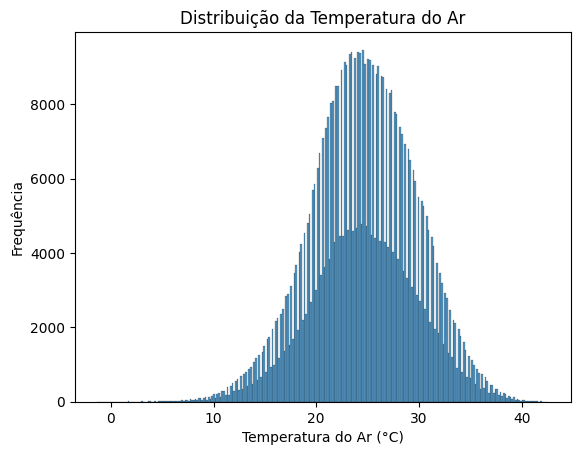

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma da Temperatura do Ar
sns.histplot(data=df, x='TEMPERATURA DO AR - BULBO SECO, HORARIA (C)')
plt.title('Distribuição da Temperatura do Ar')
plt.xlabel('Temperatura do Ar (°C)')
plt.ylabel('Frequência')
plt.show()


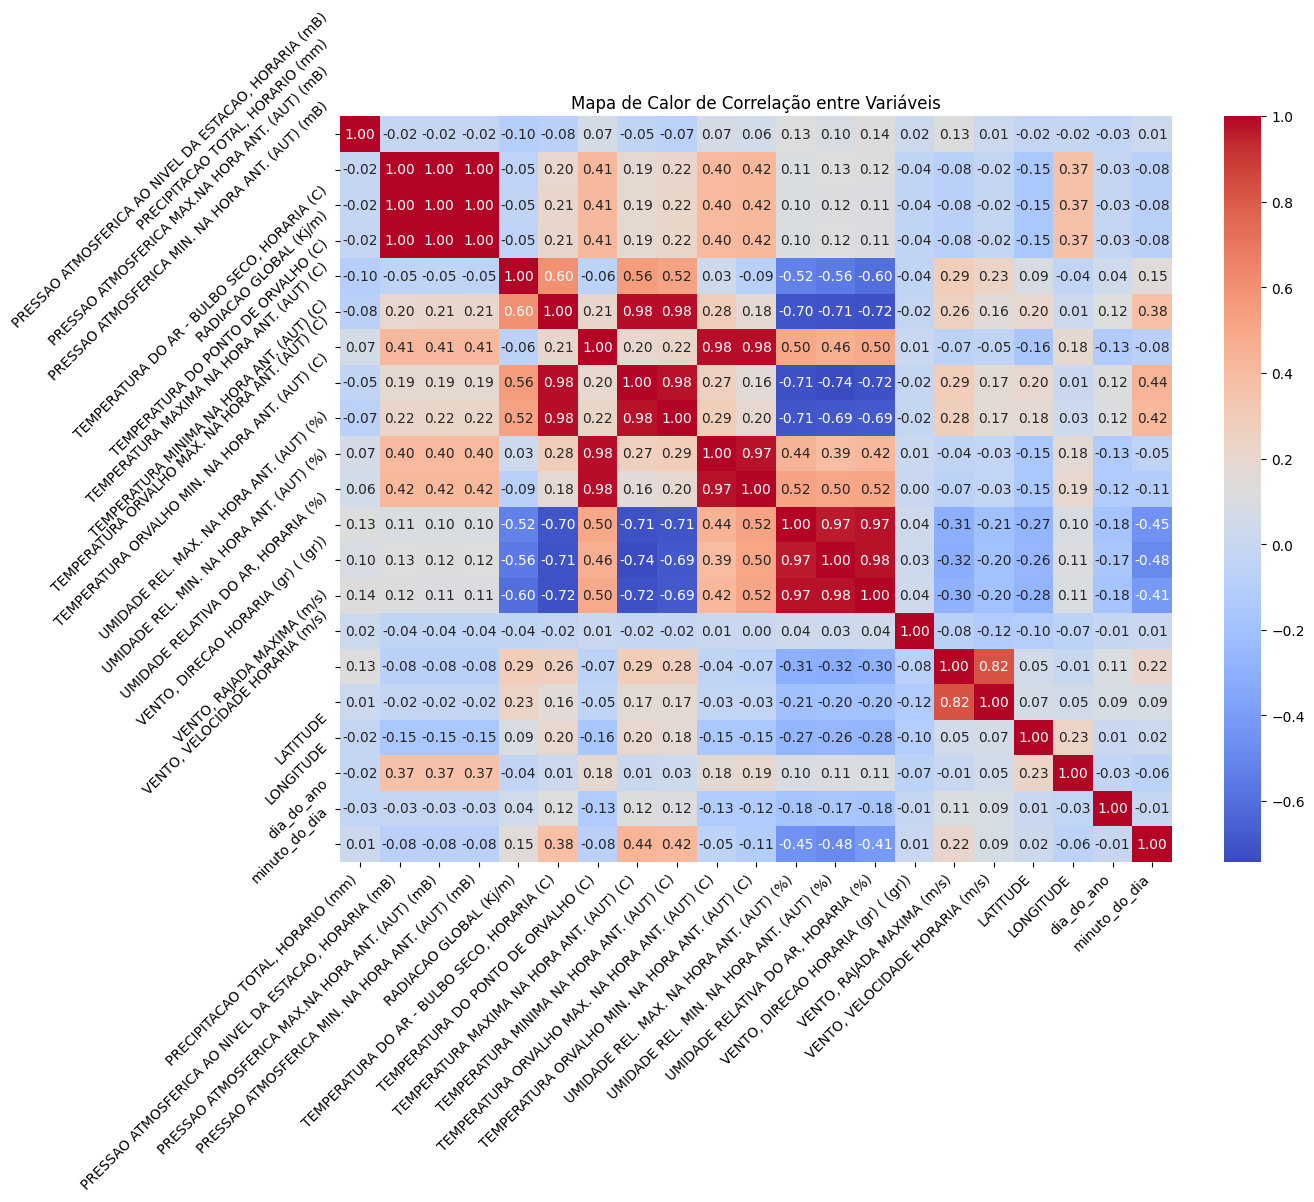

In [27]:
# Calculando a matriz de correlação
corr = df.corr()

# Criando o mapa de calor
plt.figure(figsize=(14, 12))  # Tamanho da figura
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

# Ajustes visuais
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.xticks(rotation=45, ha='right')  # Rotação dos labels do eixo X para melhor visualização
plt.yticks(rotation=45)  # Rotação dos labels do eixo Y para consistência
plt.tight_layout()  # Ajusta o layout para não cortar elementos

# Mostrando o gráfico
plt.show()


reduzindo para utilizar 30% dos dados

In [28]:
df_filtered = df.sample(frac=0.3, random_state=42)
focos_df_filtered = focos_df.sample(frac=0.3, random_state=42)

In [29]:
df_filtered.rename(columns={'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude'}, inplace=True)
df.rename(columns={'LATITUDE': 'Latitude', 'LONGITUDE': 'Longitude'}, inplace=True)

In [37]:
df['Latitude'] = df['Latitude'].round(decimals=0)
df['Longitude'] = df['Longitude'].round(decimals=0)

focos_df['Latitude'] = focos_df['Latitude'].round(decimals=0)
focos_df['Longitude'] = focos_df['Longitude'].round(decimals=0)

merged_df = pd.merge(df, focos_df, on=['Latitude', 'Longitude', 'dia_do_ano', 'minuto_do_dia'], how='left')

In [38]:
merged_df.describe()

,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr) ( (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Latitude,Longitude,dia_do_ano,minuto_do_dia,DiaSemChuva,Precipitacao
count,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,...,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,174694.000000,174694.000000
mean,0.122652,950.802605,951.223469,950.591648,1562.402147,25.661016,16.073194,26.377262,24.613908,16.918370,...,60.101003,158.318034,5.432507,2.082276,-20.382711,-44.622545,195.661219,895.807176,-35.752682,0.799197
std,1.258314,40.681727,40.675688,40.668775,1232.306697,5.452803,4.351797,5.586120,5.392205,4.206567,...,21.856975,105.625833,2.704807,1.492077,2.348628,2.883577,104.388943,267.043693,208.169889,3.604359
min,0.000000,820.900000,821.000000,820.700000,0.000000,-1.300000,-7.500000,-0.200000,-1.400000,-6.100000,...,8.000000,1.000000,0.000000,0.000000,-25.000000,-52.000000,1.000000,0.000000,-999.000000,0.000000
25%,0.000000,919.000000,919.400000,918.800000,304.300000,22.000000,13.000000,22.500000,21.000000,13.900000,...,43.000000,69.000000,3.600000,1.000000,-22.000000,-47.000000,106.000000,720.000000,3.000000,0.000000
50%,0.000000,949.000000,949.400000,948.800000,1498.000000,25.600000,16.700000,26.400000,24.600000,17.500000,...,60.000000,133.000000,5.300000,1.900000,-21.000000,-44.000000,208.000000,960.000000,6.000000,0.000000
75%,0.000000,982.500000,982.900000,982.200000,2628.900000,29.400000,19.400000,30.300000,28.400000,20.100000,...,78.000000,247.000000,7.000000,2.900000,-19.000000,-42.000000,283.000000,1080.000000,10.000000,0.000000
max,131.000000,1032.300000,1032.400000,1032.100000,6670.300000,42.600000,37.400000,43.500000,42.200000,38.000000,...,100.000000,360.000000,34.200000,15.100000,-14.000000,-40.000000,365.000000,1380.000000,120.000000,107.380000


In [39]:
# Proporção de focos de incêndio, dada pela quantidade de linhas sem NaN em nenhuma das colunas dividido pela quantidade total de linhas
proporcao_focos = merged_df.dropna().shape[0] / merged_df.shape[0]
proporcao_focos

0.23794340103216774

In [43]:
merged_df['teve_foco'] = merged_df.isna().any(axis=1)

In [44]:
merged_df['teve_foco'].describe()

count     734183
unique         2
top         True
freq      559489
Name: teve_foco, dtype: object

In [46]:
merged_df.describe()

,"PRECIPITACAO TOTAL, HORARIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr) ( (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Latitude,Longitude,dia_do_ano,minuto_do_dia,DiaSemChuva,Precipitacao
count,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,...,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,734183.000000,174694.000000,174694.000000
mean,0.122652,950.802605,951.223469,950.591648,1562.402147,25.661016,16.073194,26.377262,24.613908,16.918370,...,60.101003,158.318034,5.432507,2.082276,-20.382711,-44.622545,195.661219,895.807176,-35.752682,0.799197
std,1.258314,40.681727,40.675688,40.668775,1232.306697,5.452803,4.351797,5.586120,5.392205,4.206567,...,21.856975,105.625833,2.704807,1.492077,2.348628,2.883577,104.388943,267.043693,208.169889,3.604359
min,0.000000,820.900000,821.000000,820.700000,0.000000,-1.300000,-7.500000,-0.200000,-1.400000,-6.100000,...,8.000000,1.000000,0.000000,0.000000,-25.000000,-52.000000,1.000000,0.000000,-999.000000,0.000000
25%,0.000000,919.000000,919.400000,918.800000,304.300000,22.000000,13.000000,22.500000,21.000000,13.900000,...,43.000000,69.000000,3.600000,1.000000,-22.000000,-47.000000,106.000000,720.000000,3.000000,0.000000
50%,0.000000,949.000000,949.400000,948.800000,1498.000000,25.600000,16.700000,26.400000,24.600000,17.500000,...,60.000000,133.000000,5.300000,1.900000,-21.000000,-44.000000,208.000000,960.000000,6.000000,0.000000
75%,0.000000,982.500000,982.900000,982.200000,2628.900000,29.400000,19.400000,30.300000,28.400000,20.100000,...,78.000000,247.000000,7.000000,2.900000,-19.000000,-42.000000,283.000000,1080.000000,10.000000,0.000000
max,131.000000,1032.300000,1032.400000,1032.100000,6670.300000,42.600000,37.400000,43.500000,42.200000,38.000000,...,100.000000,360.000000,34.200000,15.100000,-14.000000,-40.000000,365.000000,1380.000000,120.000000,107.380000


In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734183 entries, 0 to 734182
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   PRECIPITACAO TOTAL, HORARIO (mm)                       734183 non-null  float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  734183 non-null  float64
 2   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        734183 non-null  float64
 3   PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       734183 non-null  float64
 4   RADIACAO GLOBAL (Kj/m)                                 734183 non-null  float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (C)            734183 non-null  float64
 6   TEMPERATURA DO PONTO DE ORVALHO (C)                    734183 non-null  float64
 7   TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)              734183 non-null  float64
 8   TEMPERATURA MINIMA NA HORA ANT. (A

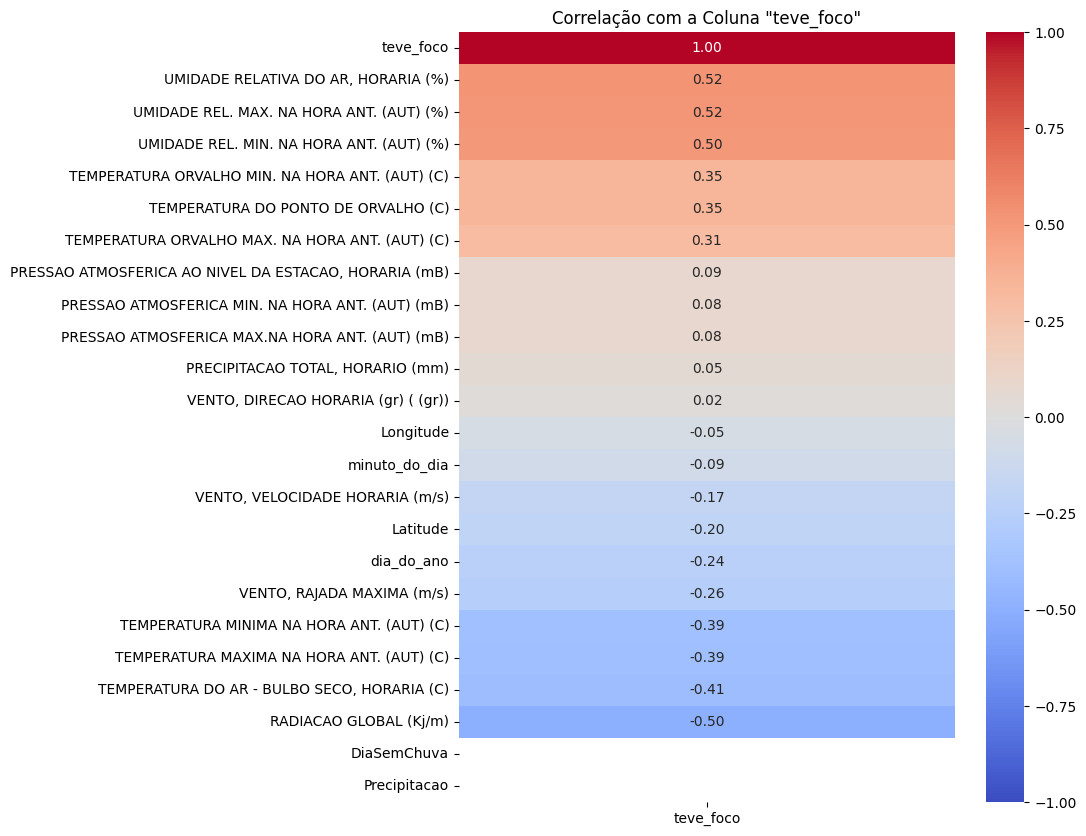

In [47]:
# Primeiro, é necessário converter a coluna booleana 'teve_foco' para um tipo numérico para o cálculo da correlação
merged_df['teve_foco'] = merged_df['teve_foco'].astype(int)

# Calcular a matriz de correlação
correlation_matrix = merged_df.corr()

# Filtrar a matriz de correlação para mostrar apenas as correlações com 'teve_foco'
correlations_with_focus = correlation_matrix[['teve_foco']].sort_values(by='teve_foco', ascending=False)

# Visualizar a correlação das variáveis com 'teve_foco'
plt.figure(figsize=(8, 10))
sns.heatmap(correlations_with_focus,
            annot=True,  # Para mostrar os valores de correlação
            cmap='coolwarm',  # Escolher uma paleta de cores
            vmin=-1, vmax=1,  # Definir o limite de valores para o mapa de cores
            fmt='.2f',  # Formatar os números para duas casas decimais
            cbar=True)  # Mostrar a barra de cores
plt.title('Correlação com a Coluna "teve_foco"')
plt.show()

In [52]:
# Calcular a matriz de correlação como antes
correlation_matrix = merged_df.corr()

# Filtrar para encontrar as colunas onde a correlação com 'teve_foco' é >= 0.3
# Usamos abs() para considerar tanto correlações positivas quanto negativas
cols_with_high_corr = correlation_matrix.index[abs(correlation_matrix["teve_foco"]) >= 0.3].tolist()

# Se você quiser incluir a coluna 'teve_foco' no DataFrame final, certifique-se de que ela está na lista
if "teve_foco" not in cols_with_high_corr:
    cols_with_high_corr.append("teve_foco")

# Restringir o DataFrame para conter apenas as colunas selecionadas
df_restricted = merged_df[cols_with_high_corr]

# Mostrando as primeiras linhas do DataFrame restrito para verificação
df_restricted.head()

,RADIACAO GLOBAL (Kj/m),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)",teve_foco
0,8.2,19.8,18.8,19.8,19.7,18.8,18.7,94.0,94.0,94.0,1
1,249.0,20.5,19.3,20.5,19.8,19.3,18.8,94.0,93.0,93.0,1
2,484.7,21.4,19.3,21.4,20.5,19.6,18.9,93.0,87.0,88.0,1
3,1088.0,22.6,19.5,22.7,21.4,19.8,19.1,89.0,82.0,83.0,1
4,1344.5,23.2,19.8,23.4,22.6,20.1,19.2,84.0,80.0,81.0,1


In [57]:
df_restricted.to_csv('variables.csv', index=False)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparar os dados
X = df_restricted.drop('teve_foco', axis=1)  # Features
y = df_restricted['teve_foco']  # Target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [56]:

# Prever o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.96


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Preparar os dados
X = df_restricted.drop('teve_foco', axis=1)  # Features
y = df_restricted['teve_foco']  # Target

# Inicializar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Configurar e executar a validação cruzada
# cv=5 define que você deseja uma validação cruzada de 5-folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Avaliar o modelo
print(f'Scores de Acurácia da Validação Cruzada: {scores}')
print(f'Média da Acurácia: {scores.mean():.2f}')
print(f'Desvio Padrão da Acurácia: {scores.std():.2f}')

Scores de Acurácia da Validação Cruzada: [0.82568426 0.80980952 0.80509    0.80252118 0.80254842]
Média da Acurácia: 0.81
Desvio Padrão da Acurácia: 0.01


Acurácia: 0.96
Precisão: 0.97
Recall: 0.98
F1-Score: 0.98


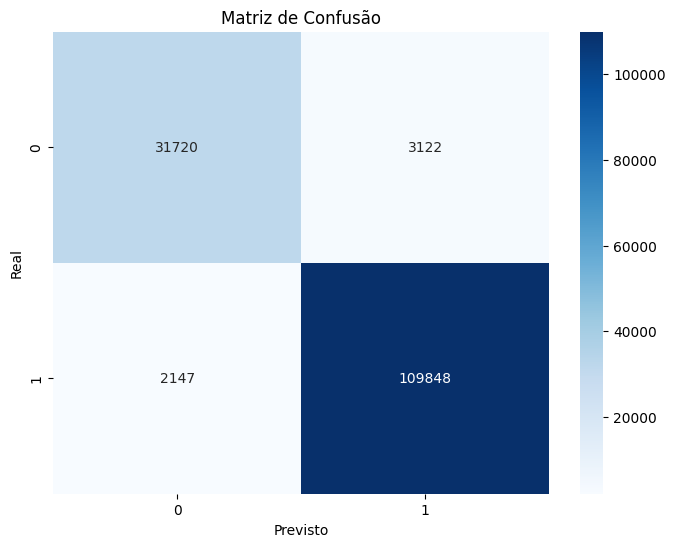

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculando métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()